**AIM**: To identify whether the image is of a Dog or a Cat.

In [ ]:
#Setting up the Kaggle API credentials
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

creating a directory where we can use the dataset.

In [ ]:
#Downloading the "Dogs vs. Cats" dataset from Kaggle
!kaggle datasets download -d salader/dogs-vs-cats

100% 1.06G/1.06G [00:11<00:00, 220MB/s]
100% 1.06G/1.06G [00:11<00:00, 101MB/s]


In [ ]:
# Unzipping the zipped dataset file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Importing the libraries
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization

In [ ]:
#Creating Training Dataset
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train', #path
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 20000 files belonging to 2 classes.


In [ ]:
# Creating Testing dataset
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test', #path
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

Found 5000 files belonging to 2 classes.


In [ ]:
# Normalizing the image pixels
def normalize(img, label):
  image = tf.cast(img/255, tf.float32)
  return image, label

train_ds = train_ds.map(normalize)
validation_ds = test_ds.map(normalize)

**MODEL CREATION**

In [ ]:
#Creating a Convolutional Neural Network (CNN) using the Keras Sequential API.
model = Sequential()
# 1st layer
model.add(Conv2D(32, kernel_size = (3,3), padding = 'valid', activation = 'relu', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
# 2nd layer
model.add(Conv2D(64, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
# 3rd layer
model.add(Conv2D(128, kernel_size = (3,3), padding = 'valid', activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())
model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
result = model.fit(train_ds, epochs = 10, validation_data = validation_ds)

Epoch 1/10
625/625 [==============================] - 78s 109ms/step - loss: 1.0320 - accuracy: 0.6046 - val_loss: 81.4677 - val_accuracy: 0.5032
Epoch 2/10
625/625 [==============================] - 68s 109ms/step - loss: 0.6234 - accuracy: 0.6730 - val_loss: 143.7893 - val_accuracy: 0.5394
Epoch 3/10
625/625 [==============================] - 70s 111ms/step - loss: 0.5443 - accuracy: 0.7253 - val_loss: 159.5695 - val_accuracy: 0.5354
Epoch 4/10
625/625 [==============================] - 70s 112ms/step - loss: 0.4578 - accuracy: 0.7803 - val_loss: 166.8131 - val_accuracy: 0.5050
Epoch 5/10
625/625 [==============================] - 68s 109ms/step - loss: 0.3829 - accuracy: 0.8269 - val_loss: 91.4647 - val_accuracy: 0.5704
Epoch 6/10
625/625 [==============================] - 66s 104ms/step - loss: 0.3153 - accuracy: 0.8599 - val_loss: 244.8524 - val_accuracy: 0.5210
Epoch 7/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2397 - accuracy: 0.8951 - val_loss: 274.3

In [ ]:
result

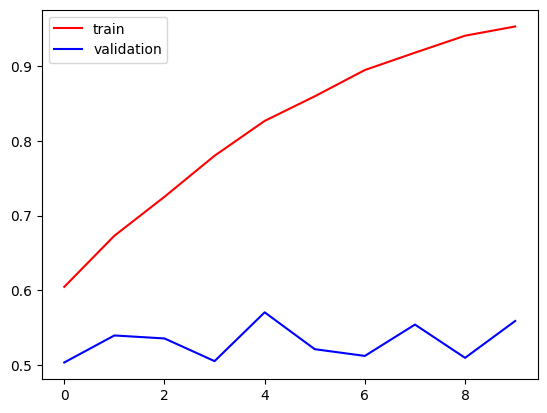

In [ ]:
import matplotlib.pyplot as plt
plt.plot(result.history['accuracy'], color='red', label="train")
plt.plot (result.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

**Inference from the Plot**

 The training accuracy (red line) is consistently increasing as the x-axis (number of training epochs) increases, it suggests that the model is learning and improving its performance on the training data whereas  validation accuracy (blue line) follows an up-and-down pattern, which indicates that the model is not generalizing well to new data(test data). This pattern indicates there is Overfiiting in the model.

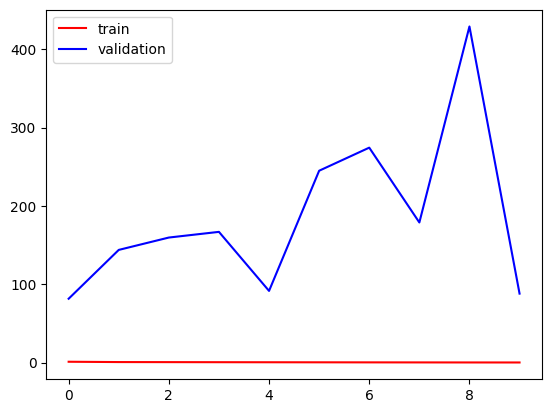

In [ ]:
plt.plot(result.history['loss' ], color= 'red', label='train')
plt.plot(result.history['val_loss' ], color='blue', label='validation')
plt.legend()
plt.show()

**Inference from the Plot**

**Decreasing Training Loss**: Indicates that the model is improving its fit to the training data, which is expected during the training process.

**Fluctuating or Increasing Validation Loss**: Suggests that the model's performance on the validation set is not consistently improving.

The inference from the plots suggests that the model is fitting too closely to the training data but struggles to generalize to validation data.

Here training lose is decresing, whereas validation loss is increasing. That is the model is giving better results for training data but bad result for testing data.

WE implement early stopping since the model's p,erformance on the validation set stops improving.

Overfitting can also be addressed by various methods such as Regularization, Data Augmentation etc..

1/1 [==============================] - 0s 18ms/step


array([[0.]], dtype=float32)

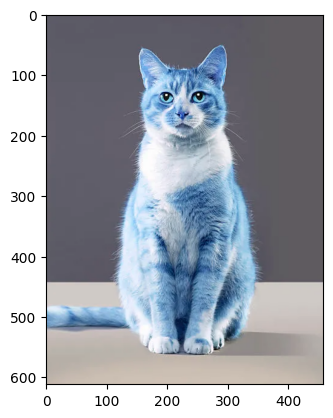

In [ ]:
# PREDICTION
import cv2
test_img = cv2.imread('/content/portrait-of-cat.webp')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

1/1 [==============================] - 0s 19ms/step


array([[1.]], dtype=float32)

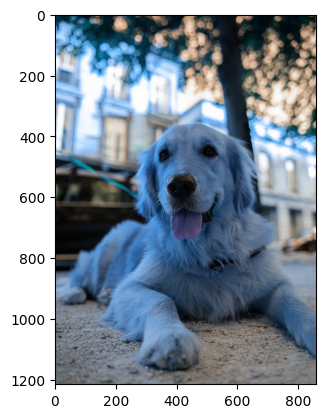

In [ ]:
# Predicting a Dog's Image
test_img = cv2.imread('/content/dog_img.webp')
plt.imshow(test_img)
test_img = cv2.resize(test_img,(256,256))
test_input = test_img.reshape((1,256,256,3))
model.predict(test_input)

Using the CNN model we were able to predict the images of Cat and Dog.